<a href="https://colab.research.google.com/github/divyavchandran/Deeplearning-for-CV/blob/main/CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os

In [7]:
os.chdir("/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday")


In [8]:
pwd


'/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday'

Convolutional Neural Networks

In [9]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
#random number selection
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
#display the image in the same screen
import glob
#to take files from drive
import PIL
from PIL import Image

In [10]:
! unzip '/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset.zip' -d '/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset'

Archive:  /content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset.zip
replace /content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/105806915_a9c13e2106_n.jpg  
  inflating: /content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg  
  inflating: /content/drive/MyDrive/FDP_Applications

In [11]:
imgFiles=glob.glob("/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/*/*.jpg")
#
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/100080576_f52e8ee070_n.jpg
/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/102841525_bd6628ae3c.jpg
/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/1031799732_e7f4008c03.jpg
/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/105806915_a9c13e2106_n.jpg
/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg
/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/1140299375_3aa7024466.jpg
/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg
/content/drive/MyDrive/FDP_Applications_of_DL_ML/handson_thursday/Flower_dataset/tiny_FR/daisy/11642632_1e7627a2cc.jpg


In [12]:
x=[]
y=[]
for fName in imgFiles:
  x_i= Image.open(fName)
  x_i=x_i.resize((299,299))
  x_i=np.array(x_i)/255.0 # normalisation; preprocessing
  x.append(x_i)
  label=fName.split("/")
  y_i=label[8]
  y.append(y_i)
  



In [13]:
print(set(y))
#to display unique classes

{'rose', 'sunflower', 'dandelion', 'tulip', 'daisy'}


In [14]:
from sklearn.preprocessing import LabelEncoder
#to label the classes
lEncoder=LabelEncoder()
y=lEncoder.fit_transform(y) # to set different random numbers to each classes
print(y)
print(set(y))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [15]:
print(lEncoder.classes_)
#to find which number corresponds to which class

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [16]:
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(500, 299, 299, 3)
(500,)


split data for training and testing

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
print(x_train.shape)
print(x_test.shape)


(400, 299, 299, 3)
(100, 299, 299, 3)


In [18]:
#standard scale the data: preprocessing
mu=x_train.mean()
std=x_train.std()
x_train_std=(x_train-mu)/std #apply feature scaling to x_train
x_test_std=(x_test-mu)/std

In [19]:
#create the network using functional API; feature extraction
input_=keras.layers.Input(shape=x_train.shape[1:])
x=keras.layers.Conv2D(filters=32,kernel_size=5,padding='same',activation='relu')(input_)
x=keras.layers.MaxPool2D(pool_size=2)(x)
x=keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')(x)
x=keras.layers.MaxPool2D(pool_size=2)(x)

# Construct the DNN classifier part
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=1000, activation='relu')(x)
x = keras.layers.Dense(units=100, activation='relu')(x)
output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model_CNN = keras.models.Model(inputs=[input_], outputs=[output_])

In [20]:
model_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 350464)            0     

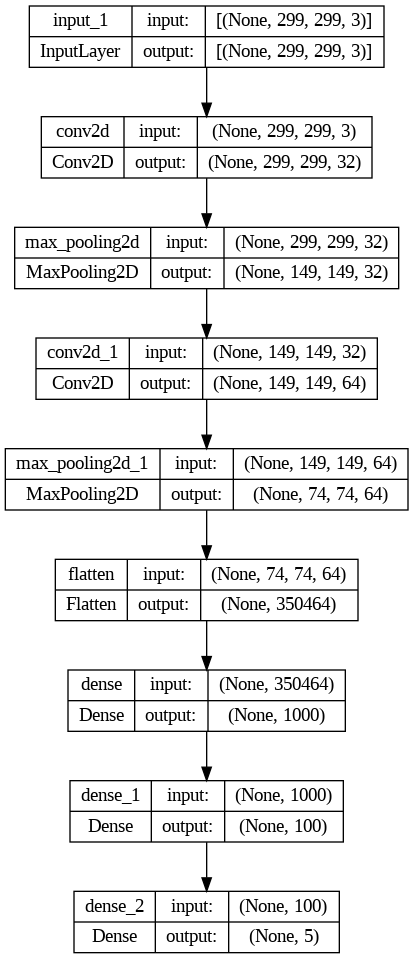

In [21]:
tf.keras.utils.plot_model(
    model_CNN,
    to_file='model_CNN.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [22]:
# Compile the network with appropriate settings for loss, optimizer and metrics.
model_CNN.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

#Training the model. 
history_CNN = model_CNN.fit(x=x_train_std, 
                            y=y_train, 
                            epochs=25, 
                            validation_split=0.1, 
                            batch_size=32)

#history_cnn (dictionary) captures the loss and accuracy in ech epoch and stores 

Epoch 1/25
12/12 [==============================] - 6s 225ms/step - loss: 24.2783 - accuracy: 0.2556 - val_loss: 1.5454 - val_accuracy: 0.2000
Epoch 2/25
12/12 [==============================] - 2s 171ms/step - loss: 1.4470 - accuracy: 0.4528 - val_loss: 1.3835 - val_accuracy: 0.4500
Epoch 3/25
12/12 [==============================] - 2s 177ms/step - loss: 1.2482 - accuracy: 0.4861 - val_loss: 1.2806 - val_accuracy: 0.4750
Epoch 4/25
12/12 [==============================] - 2s 170ms/step - loss: 1.0854 - accuracy: 0.6389 - val_loss: 1.3481 - val_accuracy: 0.4250
Epoch 5/25
12/12 [==============================] - 2s 170ms/step - loss: 0.9183 - accuracy: 0.6639 - val_loss: 1.5458 - val_accuracy: 0.4500
Epoch 6/25
12/12 [==============================] - 2s 171ms/step - loss: 0.6476 - accuracy: 0.8083 - val_loss: 1.5460 - val_accuracy: 0.3750
Epoch 7/25
12/12 [==============================] - 2s 171ms/step - loss: 0.5246 - accuracy: 0.8139 - val_loss: 1.8606 - val_accuracy: 0.3250
Epoch

In [23]:
history_CNN.history.items()

dict_items([('loss', [24.27834129333496, 1.446966528892517, 1.2481887340545654, 1.0853724479675293, 0.9182679653167725, 0.6476080417633057, 0.5245696902275085, 0.3910641670227051, 0.30864548683166504, 0.19046151638031006, 0.07665039598941803, 0.026053257286548615, 0.016183946281671524, 0.011218438856303692, 0.007304586935788393, 0.007572815753519535, 0.005318340379744768, 0.002855998231098056, 0.0012869684724137187, 0.0006771152839064598, 0.00043092589476145804, 0.0003328964812681079, 0.00025128055131062865, 0.0001990485907299444, 0.0001715225080261007]), ('accuracy', [0.25555557012557983, 0.45277777314186096, 0.4861111044883728, 0.6388888955116272, 0.6638888716697693, 0.8083333373069763, 0.8138889074325562, 0.8777777552604675, 0.9138888716697693, 0.9555555582046509, 0.9861111044883728, 1.0, 0.9916666746139526, 0.9972222447395325, 1.0, 1.0, 0.9972222447395325, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), ('val_loss', [1.5453518629074097, 1.3835006952285767, 1.2806075811386108, 1.348121404

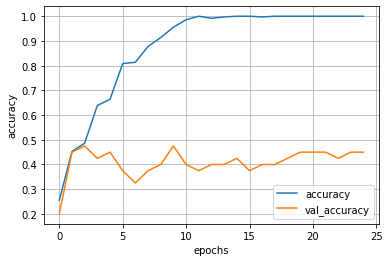

In [24]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_CNN.history.items() if k in keys} #returns the training accuracy and validation accuracy as two separate lists,
                                                                      #attached with the keys in a dictionary format 

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [25]:
# Pass the appropriate arguments for evaluate function.
test_loss, test_accuracy = model_CNN.evaluate(x_test_std, y_test)

print("Test-loss: %f, Test-accuracy: %f" % (test_loss,  test_accuracy))
#Test-loss: 3.652072, Test-accuracy: 0.470000

4/4 [==============================] - 0s 77ms/step - loss: 3.4149 - accuracy: 0.4700
Test-loss: 3.414945, Test-accuracy: 0.470000


In [26]:
cProba = model_CNN.predict(x_test_std[:10])

print(cProba)

1/1 [==============================] - 0s 415ms/step
[[9.9984384e-01 1.0809543e-05 2.3780916e-05 1.2103118e-04 5.0772695e-07]
 [9.8663181e-01 3.2746529e-03 9.5236329e-03 3.9781382e-05 5.3007854e-04]
 [2.8119617e-22 8.8584097e-20 1.9033399e-05 5.1813534e-13 9.9998093e-01]
 [8.2507217e-04 3.5571981e-02 9.4440049e-01 9.9400808e-05 1.9102972e-02]
 [2.7310314e-02 9.6540135e-01 4.4845715e-03 2.7955601e-03 8.2053930e-06]
 [7.0352318e-05 1.7449496e-03 1.8472703e-04 9.9777728e-01 2.2268292e-04]
 [1.6670436e-02 7.1539932e-01 7.0472490e-03 2.5488693e-01 5.9960512e-03]
 [8.7303775e-08 7.7236082e-06 7.1228480e-01 3.6433480e-07 2.8770703e-01]
 [9.8476493e-01 3.8494023e-03 2.3044986e-03 7.6919687e-03 1.3890887e-03]
 [2.3646789e-05 5.6006573e-02 4.8429734e-01 4.0081996e-02 4.1959044e-01]]


In [27]:
cLabel = np.argmax(cProba,axis=-1) 

print(cLabel)

[0 0 4 2 1 3 1 2 0 2]


In [28]:
print(y_test[:10])

[2 3 2 0 0 3 1 2 3 4]
